# Question_5: Plot the distribution of delay times.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import glob as glob


In [46]:
all_files = glob.glob(r'C:\users\Annelien\Documents\SCHOOL\ACRM\Project NMBS\group7-group-assignment-\Data\Trips\*.csv')

all_files

['C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_20_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_21_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_22_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_23_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_24_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_25_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_26_9.csv_processed.csv']

In [47]:
df = pd.concat((pd.read_csv(f) for f in all_files))
df.head()

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure
0,0,2020-09-20,12408,EXTRA,SNCB/NMBS,19,09:50:07,09:50:31,09:50:00,09:50:00,NaN,LOMMEL,19,2020-09-20 00:00:00,2020-09-20,2020-09-20,2020-09-20
1,1,2020-09-20,12941,EXTRA,SNCB/NMBS,21A,18:16:52,18:16:52,18:12:00,18:12:00,NaN,KIEWIT,21A,2020-09-20 00:00:00,2020-09-20,2020-09-20,2020-09-20
2,2,2020-09-20,12410,EXTRA,SNCB/NMBS,19,11:56:31,11:56:58,11:57:00,11:57:00,NaN,OVERPELT,19,2020-09-20 00:00:00,2020-09-20,2020-09-20,2020-09-20
3,3,2020-09-20,12410,EXTRA,SNCB/NMBS,NaN,12:08:31,NaN,12:09:00,NaN,NaN,HAMONT,19,2020-09-20 00:00:00,NaN,2020-09-20,NaN
4,4,2020-09-20,12442,EXTRA,SNCB/NMBS,NaN,22:18:13,NaN,22:20:00,NaN,NaN,MOL,19,2020-09-20 00:00:00,NaN,2020-09-20,NaN


In [49]:
df = df[['Train number', 'Railway operators', 'Time of real arrival','Time of planned arrival', 'Name of the stop']]    #filteren op kolommen dat je nodig hebt
df.dropna(subset = ['Time of planned arrival'], inplace = True) #lege values laten vallen, want je kan hier geen delay van berekenen
df.head(5)

,Train number,Railway operators,Time of real arrival,Time of planned arrival,Name of the stop
0,12408,SNCB/NMBS,09:50:07,09:50:00,LOMMEL
1,12941,SNCB/NMBS,18:16:52,18:12:00,KIEWIT
2,12410,SNCB/NMBS,11:56:31,11:57:00,OVERPELT
3,12410,SNCB/NMBS,12:08:31,12:09:00,HAMONT
4,12442,SNCB/NMBS,22:18:13,22:20:00,MOL


In [52]:
difference = df.sort_values(by=['Train number', 'Time of planned arrival'], ascending = True).groupby('Train number').tail(1)   #je moet sorteren anders staan je routes niet bijeen (volgens wat gepland is! )
difference.head(5)

,Train number,Railway operators,Time of real arrival,Time of planned arrival,Name of the stop
768,10,SNCB/NMBS,21:33:24,21:35:00,BRUSSEL-ZUID
164,11,SNCB/NMBS,07:38:56,07:30:00,HERGENRATH
36329,12,SNCB/NMBS,20:09:27,19:35:00,BRUSSEL-ZUID
4566,13,SNCB/NMBS,09:30:00,09:30:00,HERGENRATH
6781,14,SNCB/NMBS,17:54:22,17:35:00,BRUSSEL-ZUID


In [53]:
difference['Time of real arrival'] = pd.to_datetime(difference['Time of real arrival'], format='%H:%M:%S')      #je format je real arrival into datetime
difference['Time of planned arrival'] = pd.to_datetime(difference['Time of planned arrival'], format='%H:%M:%S')      #je format je planned arrival into datetime
difference['Delta'] = difference.apply(lambda x: (x['Time of real arrival']-x['Time of planned arrival']).total_seconds(), axis = 1)    #average delay time in seconds

In [54]:
difference['Delta'].head()


768       -96.0
164       536.0
36329    2067.0
4566        0.0
6781     1162.0
Name: Delta, dtype: float64

In [55]:
difference.loc[difference['Delta'] < 0, "Delta"]=0

In [56]:
difference['Delta'].head(5)

768         0.0
164       536.0
36329    2067.0
4566        0.0
6781     1162.0
Name: Delta, dtype: float64

In [57]:
difference.head()

,Train number,Railway operators,Time of real arrival,Time of planned arrival,Name of the stop,Delta
768,10,SNCB/NMBS,1900-01-01 21:33:24,1900-01-01 21:35:00,BRUSSEL-ZUID,0.0
164,11,SNCB/NMBS,1900-01-01 07:38:56,1900-01-01 07:30:00,HERGENRATH,536.0
36329,12,SNCB/NMBS,1900-01-01 20:09:27,1900-01-01 19:35:00,BRUSSEL-ZUID,2067.0
4566,13,SNCB/NMBS,1900-01-01 09:30:00,1900-01-01 09:30:00,HERGENRATH,0.0
6781,14,SNCB/NMBS,1900-01-01 17:54:22,1900-01-01 17:35:00,BRUSSEL-ZUID,1162.0


Text(0.5, 1.0, 'Distribution of delay times')

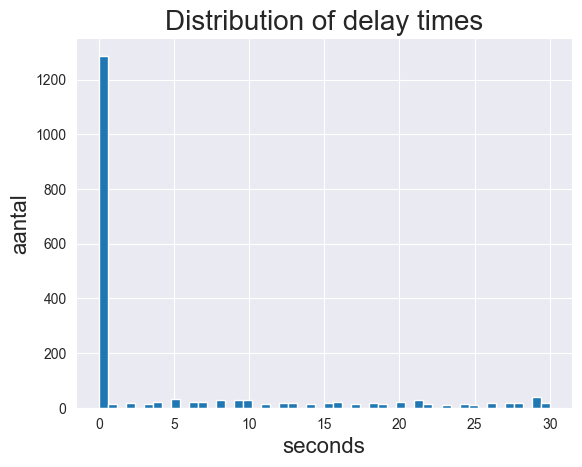

In [70]:
difference.hist(column ='Delta', range=[0,30], bins = 50)
plt.xlabel('seconds', fontsize = 16)
plt.ylabel('aantal', fontsize = 16)
plt.title('Distribution of delay times', fontsize = 20)